### 9.3 Comparing optimizers on the Beale Function (3.0 points)
The [Beale function](https://www.sfu.ca/~ssurjano/beale.html) is a non-convex function that is often used as a test problem for optimization algorithms. It has a global minimum of 0 at the point (3, 0.5). The function is defined bx[1]:
$$f(x, y) =  \left(1.5 - x + xy\right)^{2} + \left(2.25 - x + xy^{2}\right)^{2} + \left(2.625 - x + xy^{3}\right)^{2}$$
We will be using the Beale function to visualize some of Pytorch's built-in optimization algorithms. Implement the Beale function in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [7]:
def beale(x):
    return (1.5 - x[0] + x[0]*x[1])** 2 + (2.25 - x[0] + x[0]* x[1]**2)**2 + (2.625 - x[0] + x[0]* x[1]**3)**2
plot_space = ((-4.5, 4.5), (-4.5, 4.5))
MIN = (3, 0.5)

#### Plotting Beale function

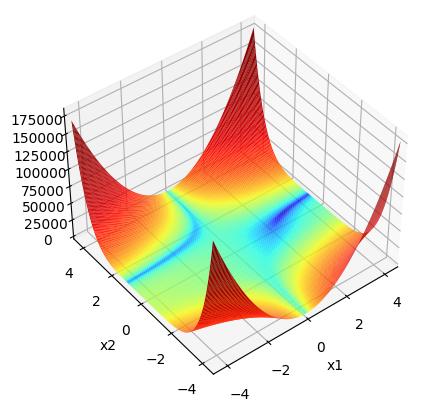

In [3]:
fig = pt.figure()
ax = fig.add_subplot(projection="3d", azim=-128, elev=43)
s = 0.05

X = np.arange(plot_space[0][0], plot_space[0][1] + s, s)
Y = np.arange(plot_space[1][0], plot_space[1][1] + s, s)
xmesh, ymesh = np.meshgrid(X, Y)
fmesh = beale(np.array([xmesh, ymesh]))
ax.plot_surface(
    xmesh,
    ymesh,
    fmesh,
    rstride=1,
    cstride=1,
    norm=LogNorm(),
    linewidth=0,
    edgecolor="none",
    cmap="jet",
)

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim(plot_space[0])
ax.set_ylim(plot_space[1])

pt.xlabel("x1")
pt.ylabel("x2")
pt.show()

Text(0.5, 1.0, 'Contour plot - colors in log scale')

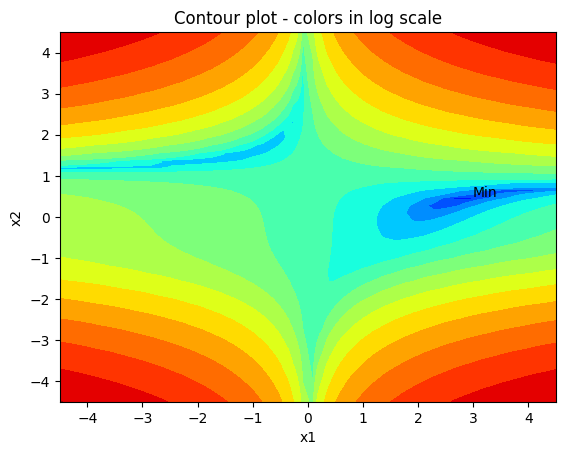

In [4]:
xmesh, ymesh = np.mgrid[plot_space[0][0]:plot_space[0][1]:50j, plot_space[1][0]:plot_space[1][1]:50j]
fmesh = beale(np.array([xmesh, ymesh]))
pt.axis("auto")

pt.contourf(xmesh, ymesh, fmesh, locator=ticker.LogLocator(base=3, numticks=20), cmap="jet")
pt.annotate("Min", MIN)
pt.xlabel("x1")
pt.ylabel("x2")
pt.title('Contour plot - colors in log scale')

#### Implementing optimizers

**Implement gradient function for Beale function.**

In [6]:
def visualize_trajectory(trajectory: list[np.ndarray]):
    """
    The function gets a list of points the optimization has visited, and plots them over the function's contour plot
    """
    print(f"Num of iterations: {len(trajectory)}")
    xmesh, ymesh = np.mgrid[
        np.min(trajectory) - 1 : np.max(trajectory) + 1 : 50j,
        np.min(trajectory) - 1 : np.max(trajectory) + 1 : 50j,
    ]
    fmesh = beale(np.array([xmesh, ymesh]))
    pt.axis("auto")
    pt.contourf(xmesh, ymesh, fmesh, locator=ticker.LogLocator(base=3, numticks=20), cmap="jet")
    array = np.array(trajectory)

    pt.plot(array.T[0], array.T[1], "r--")
    pt.plot(array[-1][0], array[-1, 1], "y*", )
    pt.annotate(
        "Initial",
        (array[0][0], array[0][1]),
        xytext=(0, 5),
        textcoords='offset fontsize',
        arrowprops=dict(facecolor="white", shrink=0.05),
    )
    pt.annotate(
        "Final",
        (array[len(array) - 1][0], array[len(array) - 1][1]),
        xytext=(0, -5),
        textcoords='offset fontsize',
        arrowprops=dict(facecolor="white", shrink=0.05),
    )
    pt.colorbar()
    print(
        "Min of the function is at:"
        + str((array[len(array) - 1][0], array[len(array) - 1][1]))
    )
    print(f"Function value at this point is {beale(array[-1])}")




In [20]:
def gradient(x):
    df_dx = (2 * (1.5 - x[0] + x[0] * x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0] * x[1] ** 2) * (-1 + x[1] ** 2) + 2 * (2.625 - x[0] + x[0] * x[1] ** 3) * (-1 + x[1] ** 3))
    df_dy = (2 * (1.5 - x[0] + x[0] * x[1]) * x[0] + 4 * (2.25 - x[0] + x[0] * x[1] ** 2) * x[0] * x[1] + 6 * (2.625 - x[0] + x[0] * x[1] ** 3) * x[0] * x[1] ** 2)
    return np.array([df_dx, df_dy])
    

Try the following starting points for all algorithms. Feel free to experiment how the starting point influences the outcome of optimization!

**All algorithms should (almost) converge to the optimum for the very easy starting point**

You can read on all the following optimization algorithms on the lecture slides or the [GoodFellow book, Optimization Chapter](https://www.deeplearningbook.org/contents/optimization.html).

In [11]:
starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

#### SGD with Momentum
**Implement SGD with momentum method that returns the trajectory of the gradient descent. By trajectory we mean the ordered list of 2D points visited by your algorithm. Please include the starting point, too.**

**Experiment with different values of momentum and learning rate explain your findings with the help of visualizations**

In [25]:
def sgd_with_momentum(starting_point, lr, momentum=0.9, epsilon=0.001) -> list[np.ndarray]:
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)
    velocity = np.array([0, 0], dtype=np.float64)
    
    while True:
        trajectory.append(x.copy())
        grad = gradient(x)
        velocity = momentum * velocity 
        velocity -= lr * grad
        x = x + velocity
        if np.linalg.norm(grad) < epsilon:
            break

    return trajectory

Num of iterations: 1473
Min of the function is at:(2.996800621002529, 0.4992003247567759)
Function value at this point is 1.6448629054100255e-06


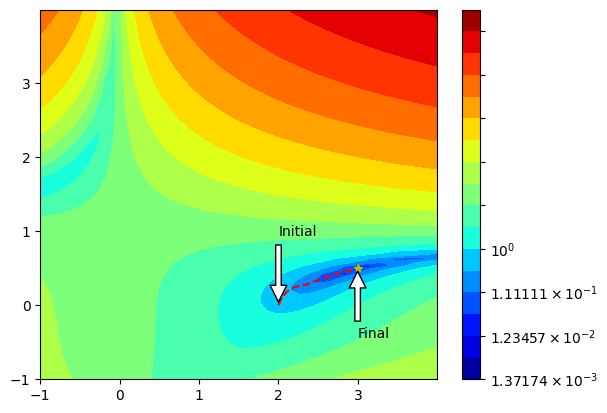

In [26]:
lr = 1e-3
trajectory = sgd_with_momentum(starting_point, lr)
visualize_trajectory(trajectory)

In [50]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 1519
Min of the function is at:(2.996801565562653, 0.4992005611758765)
Function value at this point is 1.6438900862155206e-06


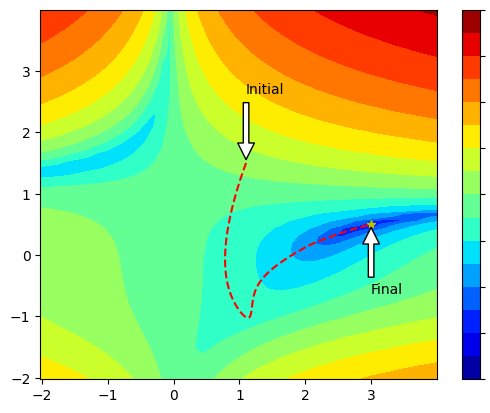

In [51]:
lr = 1e-3
trajectory = sgd_with_momentum(starting_point, lr)
visualize_trajectory(trajectory)

In [52]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 1444
Min of the function is at:(2.9968032849980766, 0.4992009915422387)
Function value at this point is 1.6421199505479982e-06


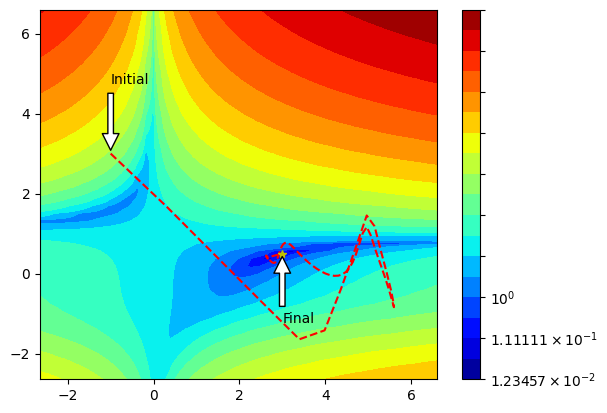

In [53]:
lr = 1e-3
trajectory = sgd_with_momentum(starting_point, lr)
visualize_trajectory(trajectory)

#### RMSProp
**Implement RMSprop method that returns the trajectory of the gradient descent.**
**Experiment with different values of beta for RMSProp and explain your findings with the help of visualizations**

In [28]:
def rmsprop(starting_point, lr=0.001, beta=0.9, epsilon=.001, max_iters=1e5):
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)
    r = np.zeros_like(x, dtype=np.float64)

    for _ in range(int(max_iters)):
        trajectory.append(x.copy())
        grad = gradient(x)

        r = beta * r + (1 - beta) * grad**2
        x = x - lr * grad / (np.sqrt(r) + epsilon)

    return trajectory

Num of iterations: 100000
Min of the function is at:(3.0004103360340775, 0.4995106417797748)
Function value at this point is 8.08132148740045e-06


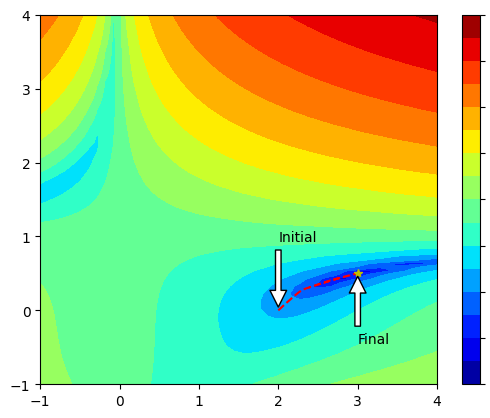

In [29]:
lr = 1e-3
trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

In [54]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(3.0004103360340784, 0.499510641779775)
Function value at this point is 8.081321487400518e-06


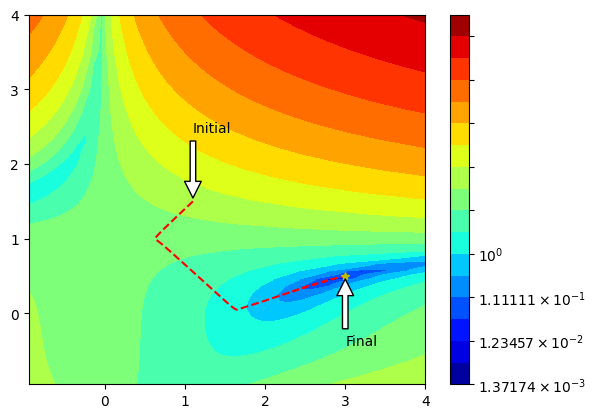

In [55]:
lr = 1e-3
trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

In [56]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(-28.065758235050644, 1.0337424272793998)
Function value at this point is 0.5087431984287266


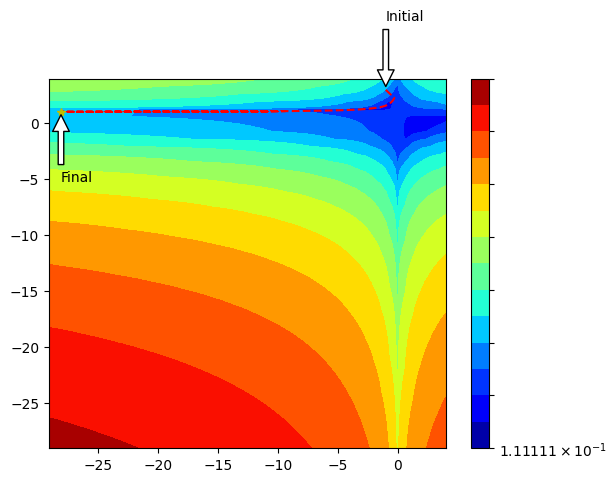

In [57]:
lr = 1e-3
trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

In [58]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(3.0004103360340784, 0.499510641779775)
Function value at this point is 8.081321487400518e-06


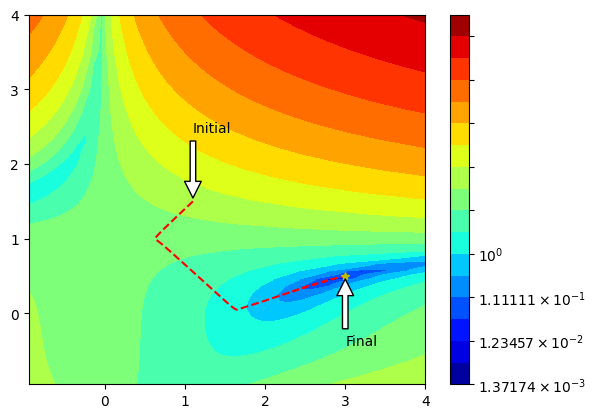

In [59]:
lr = 1e-3
trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

In [60]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(-28.065758235050644, 1.0337424272793998)
Function value at this point is 0.5087431984287266


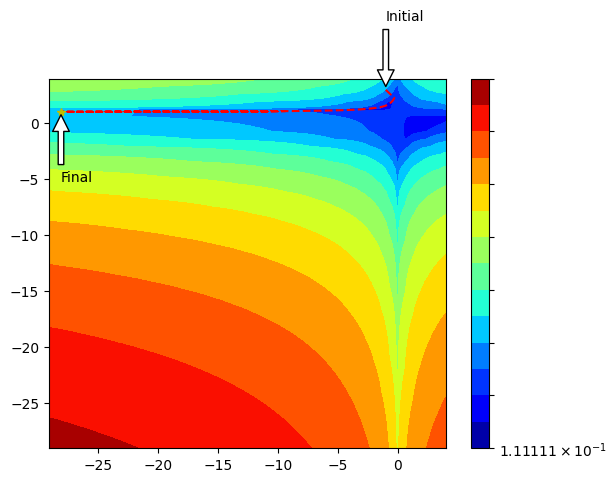

In [61]:
lr = 1e-3
trajectory = rmsprop(starting_point, lr)
visualize_trajectory(trajectory)

#### AdaGrad
**Implement AdaGrad method that returns the trajectory of the gradient descent.**
**Experiment with different values of learning rate and explain your findings with the help of visualizations**

In [34]:
def adagrad(starting_point, lr=0.01, epsilon=0.001, max_iters=1e6):
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)
    r = np.zeros_like(x, dtype=np.float64)

    for _ in range(int(max_iters)):
        trajectory.append(x.copy())
        grad = gradient(x)

        r = r + grad**2
        x = x - lr * grad / (np.sqrt(r) + epsilon)

    return trajectory

Num of iterations: 1000000
Min of the function is at:(2.945355247863743, 0.48602584090399537)
Function value at this point is 0.0005084380865893293


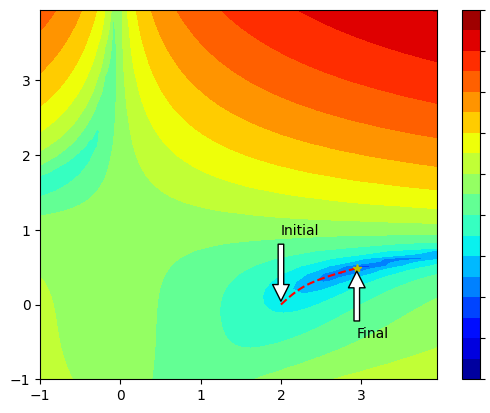

In [35]:
lr = 1e-3
trajectory = adagrad(starting_point, lr)
visualize_trajectory(trajectory)

In [62]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 1000000
Min of the function is at:(1.6955682235537703, 0.3665219419394856)
Function value at this point is 1.8192443174017519


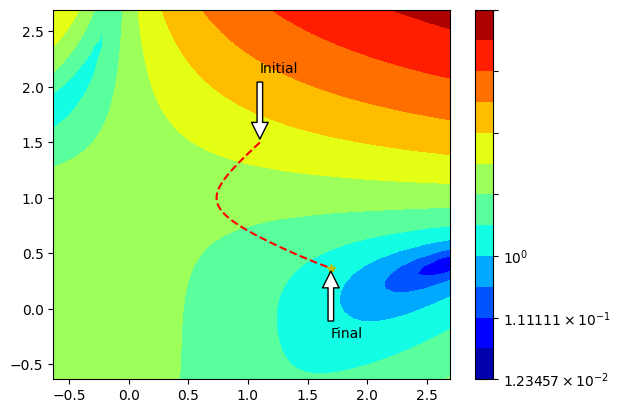

In [63]:
lr = 1e-3
trajectory = adagrad(starting_point, lr)
visualize_trajectory(trajectory)

In [64]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 1000000
Min of the function is at:(-0.26505605848064306, 2.4019521550756058)
Function value at this point is 2.8583248796602723


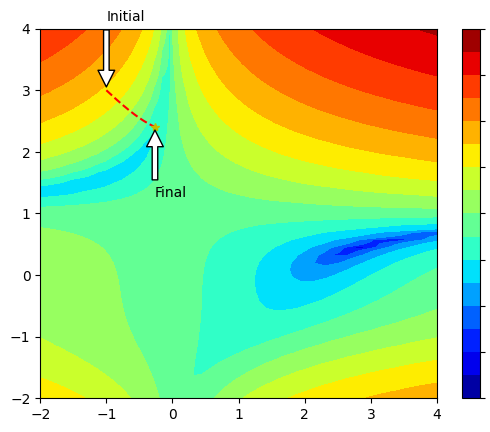

In [65]:
lr = 1e-3
trajectory = adagrad(starting_point, lr)
visualize_trajectory(trajectory)

**Implement Adam method that returns the trajectory of the gradient descent.**
**Experiment with different values of beta1 and beta2 and weight_decay for Adam and explain your findings with the help of visualizations**

In [38]:
def adam(starting_point, lr=0.001, beta1=0.9, beta2=0.999, epsilon=0.001, max_iters=1e5):
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)
    s = np.zeros_like(x, dtype=np.float64)
    m = np.zeros_like(x, dtype=np.float64)

    for _ in range(int(max_iters)):
        trajectory.append(x.copy())
        t += 1
        grad = gradient(x)
        s = beta1 * s + (1 - beta1) * grad
        m = beta2 * m + (1 - beta2) * grad**2
        s_hat = s / (1 - beta1**t)
        m_hat = m / (1 - beta2**t)
        x = x - lr * s_hat / (np.sqrt(m_hat) + epsilon)

    return trajectory

Num of iterations: 100000
Min of the function is at:(3.0, 0.5)
Function value at this point is 0.0


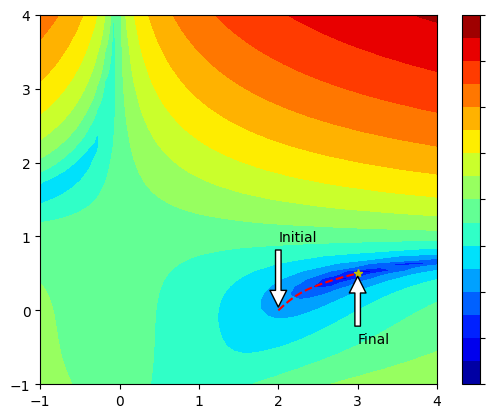

In [39]:
lr = 1e-3
trajectory = adam(starting_point, lr)
visualize_trajectory(trajectory)

In [66]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(3.0, 0.5)
Function value at this point is 0.0


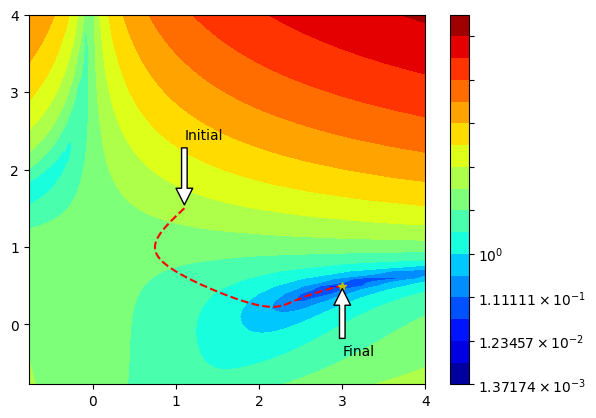

In [67]:
lr = 1e-3
trajectory = adam(starting_point, lr)
visualize_trajectory(trajectory)

In [68]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(-48.46951668900084, 1.020081989659069)
Function value at this point is 0.4832503762843775


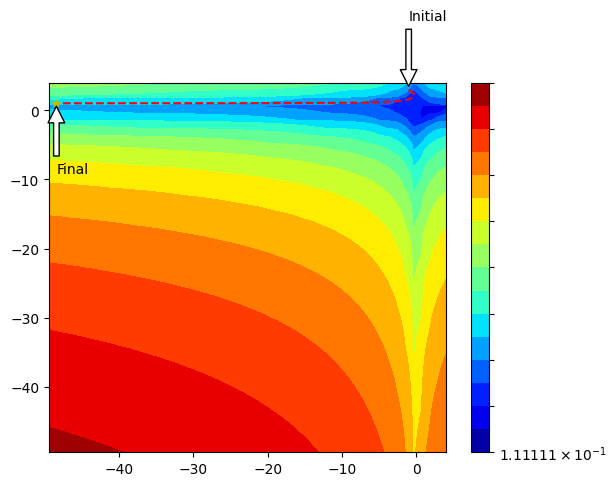

In [69]:
lr = 1e-3
trajectory = adam(starting_point, lr)
visualize_trajectory(trajectory)

#### AdamW
Traditional Adam optimizer intertwines weight decay with its learning rate, which can lead to suboptimal regularization. AdamW addresses this by applying weight decay directly to the weights, independent of the optimizer's adaptive learning rate mechanism. This approach aligns more closely with how weight decay is implemented in classical optimizers like Stochastic Gradient Descent (SGD). You can read more about AdamW here https://openreview.net/pdf?id=Bkg6RiCqY7.

**Implement AdamW method that returns the trajectory of the gradient descent.**

In [40]:
def adamw(
    starting_point,
    lr=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=0.001,
    max_iters=1e5,
    weight_decay=0.01,
):
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)
    m = np.zeros_like(x, dtype=np.float64)
    v = np.zeros_like(x, dtype=np.float64)
    t = 0

    for _ in range(int(max_iters)):
        trajectory.append(x.copy())
        t += 1
        grad = gradient(x)
        grad += weight_decay * x
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)

    return trajectory

Num of iterations: 100000
Min of the function is at:(2.917280557354903, 0.4786602488322969)
Function value at this point is 0.001202522004191699


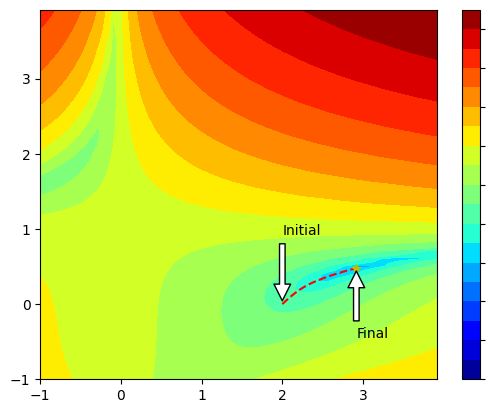

In [41]:
lr = 1e-3
trajectory = adamw(starting_point, lr)
visualize_trajectory(trajectory)

In [70]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(2.917280506059198, 0.47866041518735863)
Function value at this point is 0.0012025227050225533


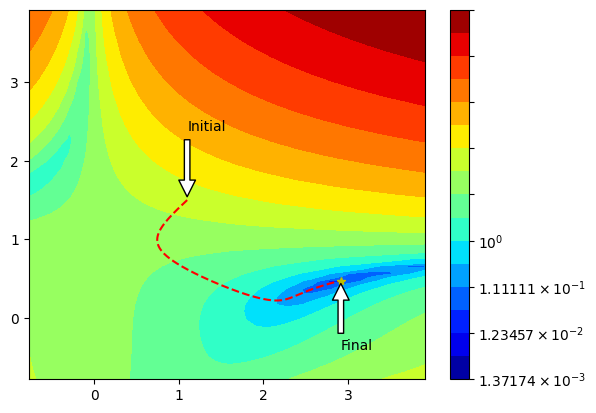

In [71]:
lr = 1e-3
trajectory = adamw(starting_point, lr)
visualize_trajectory(trajectory)

In [72]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 100000
Min of the function is at:(-5.070061029461687, 1.1681606020919204)
Function value at this point is 0.73006747054043


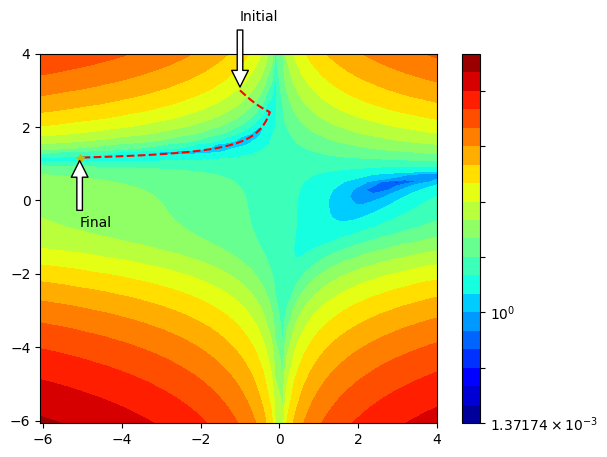

In [73]:
lr = 1e-3
trajectory = adamw(starting_point, lr)
visualize_trajectory(trajectory)

**Is the difference between Adam and AdamW negligible ? If so, explain why.**

The difference between Adam and AdamW is visible in tthe hard task. In the easy tasks they both perform well. But in the hard task, AdamW is performing better. AdamW's explicit decoupling of weight decay from gradient updates allows for better control over the regularization effect, results in improved generalization. So, we can see that AdamW performs better. 

#### Implementing Newton Raphson method for optimization

**(1) Implement hessian function for the Beale function.**

**(2) Implement newton_raphson method that returns the trajectory. Consider keeping the number of iterations low for this one. It easily diverges.**

In [78]:
def hessian(x):
    x[0], x[1] = x
    d2f_dx2 = 2 * (-1 + x[1]) ** 2 + 2 * (-1 + x[1] ** 2) ** 2 + 2 * (-1 + x[1] ** 3) ** 2
    d2f_dy2 = 2 * x[0] ** 2 + 4 * x[0] ** 2 * x[1] ** 2 + 6 * x[0] ** 2 * x[1] ** 4
    d2f_dxdy = 2 * (-1 + x[1]) * x[0] + 4 * (-1 + x[1] ** 2) * x[0] * x[1] + 6 * (-1 + x[1] ** 3) * x[0] * x[1] ** 2
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])


def newton_raphson(starting_point, epsilon=0.001, max_iters=40) -> list[np.ndarray]:
    trajectory = []
    x = np.array(starting_point, dtype=np.float64)

    for _ in range(max_iters):
        trajectory.append(x.copy())
        grad = gradient(x)
        hess = hessian(x)

        hess_inv = np.linalg.inv(hess)
    
        step = -hess_inv @ grad
        x = x + step

    return trajectory

Num of iterations: 10
Min of the function is at:(3.268203879497698, 0.5641708342759315)
Function value at this point is 0.009377498457430293


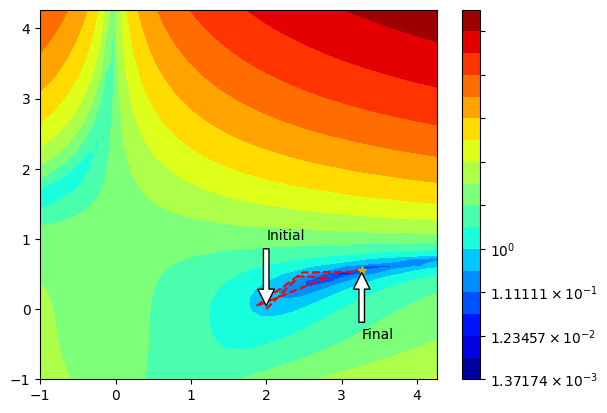

In [49]:
trajectory = newton_raphson(starting_point)
visualize_trajectory(trajectory)

In [80]:
# starting_point = np.array([2,0]) #very easy
starting_point = np.array([1.1, 1.5]) #easy
# starting_point = np.array([-1, 3]) #hard

Num of iterations: 40
Min of the function is at:(-0.13912608998714832, 2.863286275231135)
Function value at this point is 3.3500692443420417


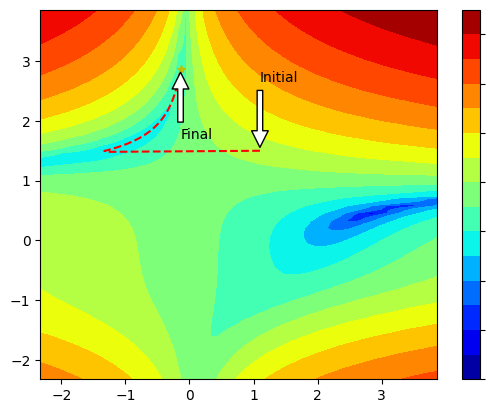

In [81]:
trajectory = newton_raphson(starting_point)
visualize_trajectory(trajectory)

In [76]:
# starting_point = np.array([2,0]) #very easy
# starting_point = np.array([1.1, 1.5]) #easy
starting_point = np.array([-1, 3]) #hard

Num of iterations: 40
Min of the function is at:(-0.009496781946822012, 6.7545802493707185)
Function value at this point is 5.509444333411356


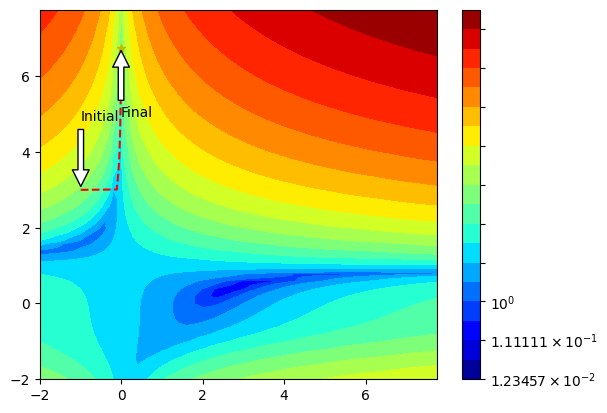

In [79]:
trajectory = newton_raphson(starting_point)
visualize_trajectory(trajectory)